<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/fuzzy_k_nearest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is a simple code for the Minkowski distance-based fuzzy k-nearest neighbor regression (Md-FKNNreg),
# fuzzy k-nearest neighbor regression (FKNNreg), and k-nearest neighbor regression (KNNreg) models
# based on the article:
    # Kumbure, M.M. and Luukka, P. A generalized fuzzy k-nearest neighbor
    # regression model based on Minkowski distance. Granular Computing, 7, 657–671 (2022).
    # https://doi.org/10.1007/s41066-021-00288-w

    # Created by Mahinda Mailagaha Kumbure, 09/2022

# Md-FKNNreg function
# INPUTS:
    # xtrain: train data is a n-by-m data matrix consisting of n patterns and m features(variables)
    # ytrain: n-dimensional output vector of Xtrain data
    # xtest: Test data is a D-by-m data matrix consisting of D patterns and m features
    # ytest: D-dimensional output vector of Xtest data
    # K: Number of nearest neighbors to be selected
    # p: parameter value of the Minkowski distance, p=2 is for the Euclidean distance

# OUTPUT:
    # predicted: Predicted y values for each test pattern in xtest

#--------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
from math import sqrt

In [2]:

# calculate the Minkowski distance (when p=2 we can apply the Euclidean distance) --> use p=2 for KNNreg, FKNNreg
def minkowski_distance(a, b, p):
	return sum(abs(e1-e2)**p for e1, e2 in zip(a,b))**(1/p)

# find the most similar neighbors
def get_neighbors(xtrain, ytrain, test_sample, K, p):
	distances = list()
	for t in range(len(xtrain)):
		dist  = minkowski_distance(test_sample, xtrain[t], p)
		distances.append((ytrain[t], dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(K):
		neighbors.append(distances[i]) # neighbors[0]=y values of neighbors, neighbors[1]=distances
	return neighbors

# calculate fuzzy memberships for the neighbors
def get_memberships(neighbors):
    m = 2
    memberships = list()
    for neighbor in neighbors:
        if neighbor[1] == 0:
            memberships.append(0)
        else:
            memberships.append(neighbor[1]**(-1/(m-1)))
    return(memberships)

# calculate fuzzy weighted average of the outputs of the nearest neighbors (i.e., prediction)
def get_prediction(memberships, neighbors):
    train_y = list()
    for neighbor in neighbors:
        train_y.append(neighbor[0])
    products      = [a * b for a, b in zip(memberships, train_y)]
    predicted_val = sum(products)/sum(memberships)
    return predicted_val


# Functions for the nearest neighbor regression methods
#...............................................................................................................
# Minkowski distance-based Fuzzy k-nearest neighbor regression (Md-FKNNreg) function:
def Md_FKNNreg(xtrain, ytrain, xtest, K, p):
    yhat_mdfknn = list()
    for test_sample in xtest:
        mdfknn_neighbors  = get_neighbors(xtrain, ytrain, test_sample, K, p)
        mem_mdfknn        = get_memberships(mdfknn_neighbors)
        mdfknn_prediction = get_prediction(mem_mdfknn, mdfknn_neighbors)
        yhat_mdfknn.append(mdfknn_prediction)
    return yhat_mdfknn


# Fuzzy k-nearest neighbor regression (FKNNreg) function:
def FKNNreg(xtrain, ytrain, xtest, K, p=2):
    yhat_fknn = list()
    for test_sample in xtest:
        fknn_neighbors   = get_neighbors(xtrain, ytrain, test_sample, K, p)
        fknn_memberships = get_memberships(fknn_neighbors)
        fknn_preidiction = get_prediction(fknn_memberships,fknn_neighbors)
        yhat_fknn.append(fknn_preidiction)
    return yhat_fknn


# K-nearest neighbor regression (KNNreg) function:
def KNNreg(xtrain, ytrain, xtest, K, p=2):
    yhat_knn = list()
    for test_sample in xtest:
        knn_neighbors      = get_neighbors(xtrain, ytrain, test_sample, K, p)
        knn_memberships    = np.ones(K)
        knn_preidiction    = get_prediction(knn_memberships,knn_neighbors)
        yhat_knn.append(knn_preidiction)
    return yhat_knn

https://archive.ics.uci.edu/dataset/504/qsar+fish+toxicity

6 molecular descriptors and 1 quantitative experimental response:
1) CIC0
2) SM1_Dz(Z)
3) GATS1i
4) NdsCH
5) NdssC
6) MLOGP
7) quantitative response, LC50 [-LOG(mol/L)]



1. Cement (component 1)(kg in a m^3 mixture)
2. Blast Furnace Slag (component 2)(kg in a m^3 mixture)
3. Fly Ash (component 3)(kg in a m^3 mixture)
4. Water  (component 4)(kg in a m^3 mixture)
5. Superplasticizer (component 5)(kg in a m^3 mixture)
6. Coarse Aggregate  (component 6)(kg in a m^3 mixture)
7. Fine Aggregate (component 7)(kg in a m^3 mixture)
8. Age (day)
9. Concrete compressive strength(MPa, megapascals)

In [107]:
# An example case:

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

# import simple data set to test the FKNNreg model
#data    = pd.read_csv ('qsar_fish_toxicity.csv', sep = ';') # from UCI machine learning repository
data    = pd.read_csv ('ConcreteData.csv', sep = ';') # from UCI machine learning repository
sc_data = normalize(data) # data scaling

X = sc_data[:, 0:-1] # features set
y = sc_data[:, -1]   # set of study variable

# split the data into training and test with a 80/20 split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20)

In [8]:
import matplotlib.pyplot as plt

In [40]:
data['Strength'][:0]

Series([], Name: Strength, dtype: float64)

<Axes: >

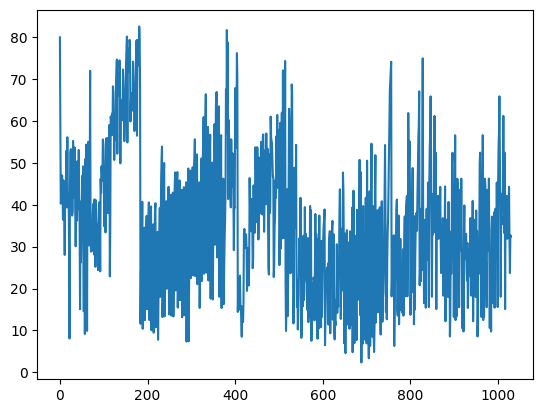

In [13]:
data['Strength'].plot()

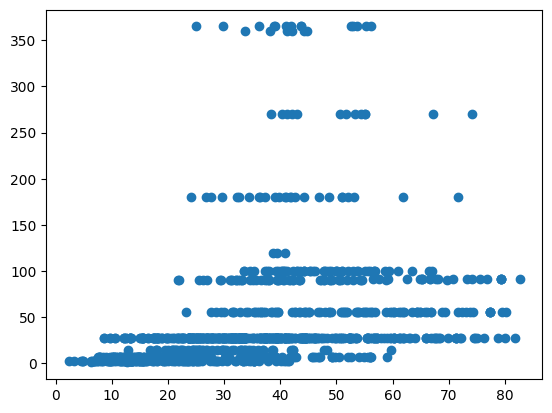

In [18]:
plt.plot(data['Strength'],data['Age'],'o')

<Axes: >

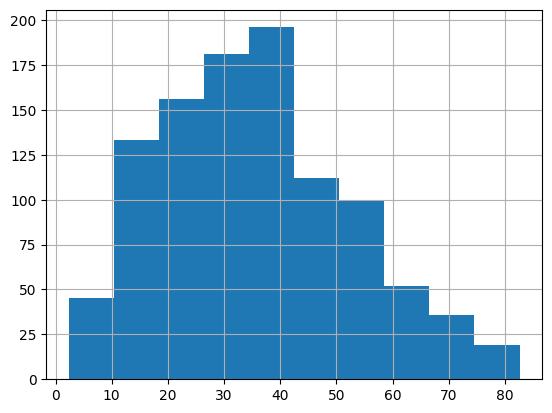

In [20]:
data['Strength'].hist(bins = 10)

In [21]:
import seaborn as sns

https://realpython.com/knn-python/

In [109]:
data.columns

Index(['Cement', 'Blast', 'FlyAsh', 'Water', 'Superplasticizer', 'Coarse',
       'Fine', 'Age', 'Strength'],
      dtype='object')

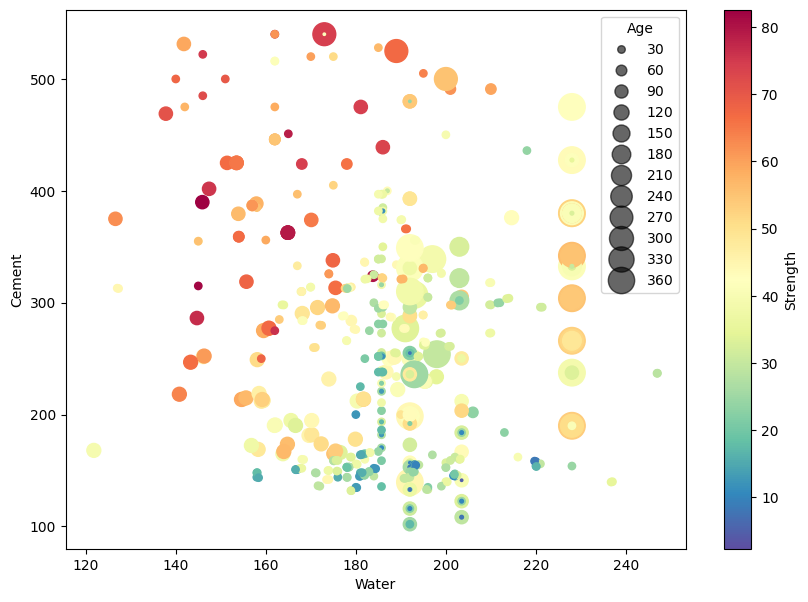

In [112]:
#cmap = sns.cubehelix_palette(as_cmap=True)
cmap = sns.color_palette("Spectral", as_cmap=True).reversed()
f, ax = plt.subplots(figsize = (10,7))
Xaxis = data['Water']
Yaxis = data['Cement']
Color = data['Strength']
Area = data['Age']

points = ax.scatter(Xaxis, Yaxis, Area, Color, cmap=cmap)
f.colorbar(points, label = data.columns[8])
plt.xlabel(data.columns[3])
plt.ylabel(data.columns[0])

handles, labels = points.legend_elements(prop="sizes", alpha=0.6)
ax.legend(handles, labels, loc="upper right", title=data.columns[7])

plt.show()

In [105]:
Area

0        28
1        28
2       270
3       365
4       360
       ... 
1025     28
1026     28
1027     28
1028     28
1029     28
Name: Age, Length: 1030, dtype: int64

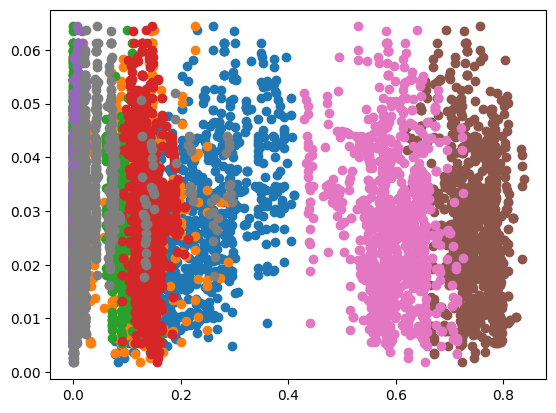

In [14]:
plt.plot(X,y,'o')
plt.show()

In [15]:
K      = 10 # define the number of nearest neighbors


#----------- Run the nearest neighbor regression methods---------

# Md-FKNNreg
p = 5 # one can run Md_FKNNreg method for different values of p
yhat_mdfknn = Md_FKNNreg(xtrain, ytrain, xtest, K, p)

# FKNNreg
yhat_fknn   = FKNNreg(xtrain, ytrain, xtest, K)

# KNNreg
yhat_knn    = KNNreg(xtrain, ytrain, xtest, K)


# Accuracy measures - Md-FKNNreg
mse_f1  = np.mean((ytest - yhat_mdfknn)**2) # mean square error
rmse_f1 = np.sqrt(mse_f1) # root mean square error
r2_f1   = 1-(sum((ytest - yhat_mdfknn)**2)/sum((ytest-np.mean(ytest))**2)) # R2 value

# Accuracy measures - FKNNreg
mse_f2  = np.mean((ytest - yhat_fknn)**2)
rmse_f2 = np.sqrt(mse_f2)
r2_f2   = 1-(sum((ytest - yhat_fknn)**2)/sum((ytest-np.mean(ytest))**2))

# Accuracy measures - KNNreg
mse_f3  = np.mean((ytest - yhat_knn)**2)
rmse_f3 = np.sqrt(mse_f3)
r2_f3   = 1-(sum((ytest - yhat_knn)**2)/sum((ytest-np.mean(ytest))**2))

# print the results
print("Md-FKNNreg Results:")
print("MSE:", mse_f1)
print("RMSE:", rmse_f1)
print("R-Squared:", r2_f1)
print(" ")

print("FKNNreg Results:")
print("MSE:", mse_f2)
print("RMSE:", rmse_f2)
print("R-Squared:", r2_f2)
print(" ")

print("KNNreg Results:")
print("MSE:", mse_f3)
print("RMSE:", rmse_f3)
print("R-Squared:", r2_f3)

Md-FKNNreg Results:
MSE: 3.818019896451357e-05
RMSE: 0.006179012782355574
R-Squared: 0.7876660562728501
 
FKNNreg Results:
MSE: 3.6513178395380886e-05
RMSE: 0.0060426135401315285
R-Squared: 0.7969369626934063
 
KNNreg Results:
MSE: 4.6707191572828766e-05
RMSE: 0.006834265986397425
R-Squared: 0.7402443555546678


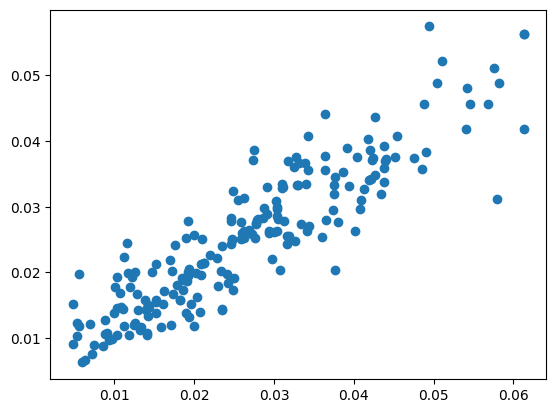

In [16]:
plt.plot(ytest, yhat_fknn, 'o')